# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_count = 0
set_count = 1

#URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q="
    response = requests.get(query_url + city).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | saleaula
City not found. Skipping...
Processing record 2 of set 1 | dingle
Processing record 3 of set 1 | kuznechnoye
Processing record 4 of set 1 | bubaque
Processing record 5 of set 1 | victoria
Processing record 6 of set 1 | barentsburg
City not found. Skipping...
Processing record 7 of set 1 | ancud
Processing record 8 of set 1 | punta arenas
Processing record 9 of set 1 | mount gambier
Processing record 10 of set 1 | ushuaia
Processing record 11 of set 1 | atuona
Processing record 12 of set 1 | gat
Processing record 13 of set 1 | busselton
Processing record 14 of set 1 | bethel
Processing record 15 of set 1 | grand river south east
City not found. Skipping...
Processing record 16 of set 1 | hobart
Processing record 17 of set 1 | banamba
Processing record 18 of set 1 | sentyabrskiy
City not found. Skipping...
Processing record 19 of set 1 | kodiak
Processing record 20 of set 1 

Processing record 33 of set 4 | nieuw amsterdam
Processing record 34 of set 4 | winnemucca
Processing record 35 of set 4 | montepuez
Processing record 36 of set 4 | kuroishi
Processing record 37 of set 4 | simbahan
Processing record 38 of set 4 | laguna
Processing record 39 of set 4 | lompoc
Processing record 40 of set 4 | paramonga
Processing record 41 of set 4 | tasiilaq
Processing record 42 of set 4 | maltahohe
Processing record 43 of set 4 | bambous virieux
Processing record 44 of set 4 | tumannyy
City not found. Skipping...
Processing record 45 of set 4 | college
Processing record 46 of set 4 | deputatskiy
Processing record 47 of set 4 | tautira
Processing record 48 of set 4 | port elizabeth
Processing record 49 of set 4 | iqaluit
Processing record 50 of set 4 | gualeguaychu
Processing record 0 of set 5 | saharsa
Processing record 1 of set 5 | vanderhoof
Processing record 2 of set 5 | torbay
Processing record 3 of set 5 | beringovskiy
Processing record 4 of set 5 | fevralsk
City n

Processing record 20 of set 8 | zacatepec
Processing record 21 of set 8 | urucara
Processing record 22 of set 8 | trabzon
Processing record 23 of set 8 | mareeba
Processing record 24 of set 8 | astana
Processing record 25 of set 8 | ust-nera
Processing record 26 of set 8 | san cristobal
Processing record 27 of set 8 | half moon bay
Processing record 28 of set 8 | epe
Processing record 29 of set 8 | halalo
City not found. Skipping...
Processing record 30 of set 8 | adrar
Processing record 31 of set 8 | port augusta
Processing record 32 of set 8 | hualmay
Processing record 33 of set 8 | ulaanbaatar
Processing record 34 of set 8 | okhotsk
Processing record 35 of set 8 | fengzhen
Processing record 36 of set 8 | westpunt
City not found. Skipping...
Processing record 37 of set 8 | mwene-ditu
Processing record 38 of set 8 | stephenville
Processing record 39 of set 8 | lagos
Processing record 40 of set 8 | bolshoy log
City not found. Skipping...
Processing record 41 of set 8 | doha
Processing 

Processing record 49 of set 11 | snyder
Processing record 50 of set 11 | grand centre
City not found. Skipping...
Processing record 0 of set 12 | merrill
Processing record 1 of set 12 | palasa
Processing record 2 of set 12 | burshtyn
Processing record 3 of set 12 | chihuahua
Processing record 4 of set 12 | petropavlovka
Processing record 5 of set 12 | kirovo-chepetsk
Processing record 6 of set 12 | denpasar
Processing record 7 of set 12 | caala
Processing record 8 of set 12 | portobelo
Processing record 9 of set 12 | inirida
Processing record 10 of set 12 | liverpool
Processing record 11 of set 12 | maxixe
Processing record 12 of set 12 | laredo
Processing record 13 of set 12 | la primavera
Processing record 14 of set 12 | aloleng
Processing record 15 of set 12 | belaya gora
Processing record 16 of set 12 | fairbanks
Processing record 17 of set 12 | bolungarvik
City not found. Skipping...
Processing record 18 of set 12 | biak
Processing record 19 of set 12 | torbeyevo
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {
    "City":new_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind,
    "Country": country, 
    "Date":date  
}
weather_df = pd.DataFrame(weather)
weather_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,11.00,122.67,75.83,91,99,3.96,PH,1595367081
1,kuznechnoye,61.12,29.87,64.99,91,100,5.57,RU,1595367648
2,bubaque,11.28,-15.83,79.36,79,100,7.00,GW,1595367302
3,victoria,22.29,114.16,82.00,88,1,5.01,HK,1595366992
4,ancud,-41.87,-73.82,48.20,76,100,3.36,CL,1595367281


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_data= weather_df.loc[weather_df["Humidity"] < 100] 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,11.00,122.67,75.83,91,99,3.96,PH,1595367081
1,kuznechnoye,61.12,29.87,64.99,91,100,5.57,RU,1595367648
2,bubaque,11.28,-15.83,79.36,79,100,7.00,GW,1595367302
3,victoria,22.29,114.16,82.00,88,1,5.01,HK,1595366992
4,ancud,-41.87,-73.82,48.20,76,100,3.36,CL,1595367281


In [8]:
# Export the City_Data into a csv
outputPath = os.path.join('output_data','city_data.csv')

with open(outputPath, 'w') as datafile:
    clean_city_data.to_csv(outputPath)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
date= datetime.datetime.fromtimestamp(int(clean_city_data['Date'][0])).strftime('%m/%d/%Y')

## Latitude vs. Temperature Plot

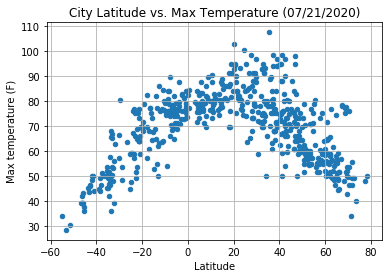

In [10]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title('City Latitude vs. Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Images/LatitudevsTemperature.png")

## Latitude vs. Humidity Plot

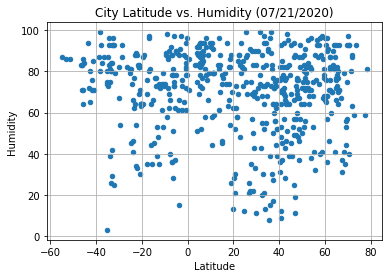

In [11]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity')
plt.title('City Latitude vs. Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("Images/LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

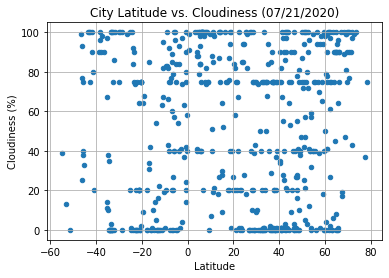

In [12]:
clean_city_data.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude vs. Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

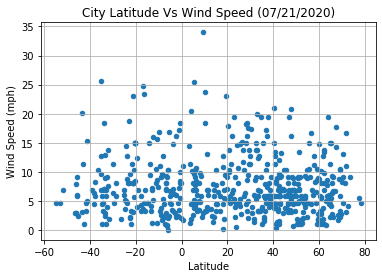

In [13]:
clean_city_data.plot(kind='scatter',x='Lat',y='Wind Speed')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/LatitudevsWindSpeed.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
southern_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

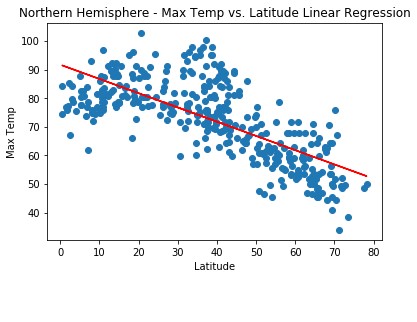

The r-squared is: -0.7197247460075977


<Figure size 432x288 with 0 Axes>

In [63]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_MaxTempvsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

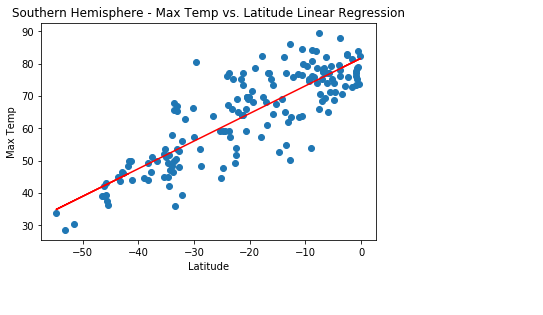

The r-squared is: 0.8463488298047659


<Figure size 432x288 with 0 Axes>

In [15]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_MaxTempvsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

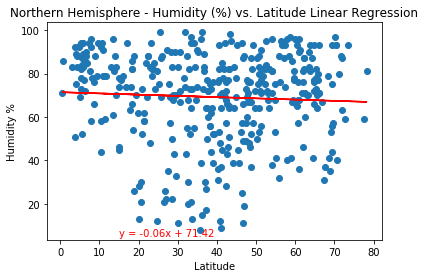

The r-squared is: -0.05331408995060449


<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_HumidityvsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

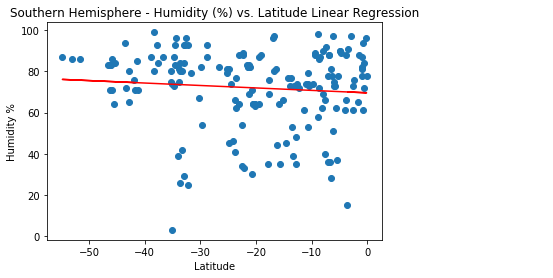

The r-squared is: -0.08840269960831851


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_HumidityvsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

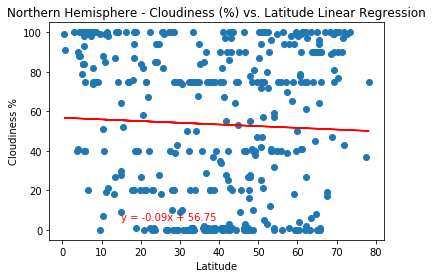

The r-squared is: -0.04353823228223684


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_CloudinessvsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

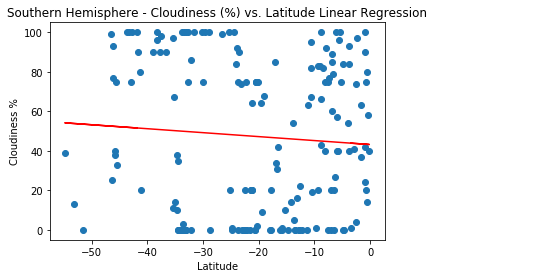

The r-squared is: -0.07315813132737581


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_CloudinessvsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

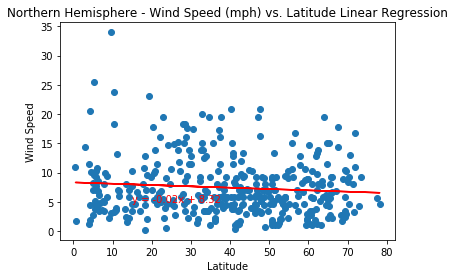

The r-squared is: -0.09007815547221652


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_WindspeedvsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

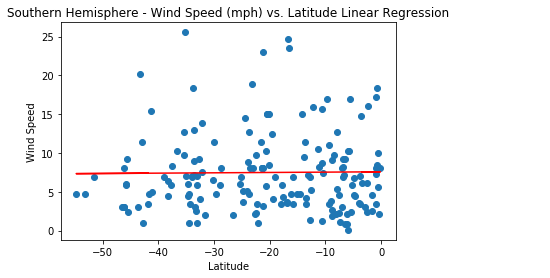

The r-squared is: 0.011957678657010013


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_WindspeedvsLat.png")